In [1]:
import tensorflow as tf
import numpy as np
from cv2 import cv2 as cv
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

model.save("handwriting.h5")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2996 - accuracy: 0.9125
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1433 - accuracy: 0.9568
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1070 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0888 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0755 - accuracy: 0.9761
10000/1 - 0s - loss: 0.0403 - accuracy: 0.9769


In [6]:
def show(aim):
    [rows, cols] = aim.shape
    for row in range(rows):
        for col in range(cols):
            print(f"{aim[row, col]:3d}", end="")
        print()
            
            
def output(aim):
    [rows, cols] = aim.shape
    with open('out.txt', 'w') as file:
        for row in range(rows):
            for col in range(cols):
                file.write(f"{aim[row, col]:3d}", )
            file.write("\n")
            
saved_model = tf.keras.models.load_model("handwriting.h5")

#### 模型预测值

Label of it: 5
Predict value: 5


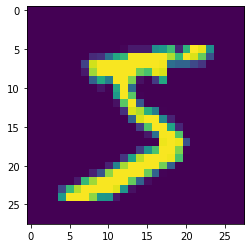

In [7]:
# 测试数据与标签值对比

res = saved_model.predict(np.array([x_train[0]]))
res = res[0].tolist()
print(f"Label of it: {y_train[0]}")
print(f"Predict value: {res.index(max(res))}")
plt.imshow(x_train[0])

[0.04827095940709114, 0.022810548543930054, 0.0020631016232073307, 0.003453053766861558, 0.012868566438555717, 0.2411116510629654, 0.6226823329925537, 0.024235177785158157, 0.017793500795960426, 0.004711108282208443]
Predict value: 6


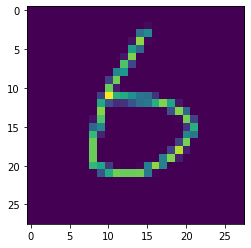

In [9]:
# 真实预测
img = cv.imread('2.jpeg', cv.IMREAD_GRAYSCALE)
scale_img = cv.resize(img, (28, 28), interpolation=cv.INTER_AREA)
plt.imshow(scale_img)

res = saved_model.predict(np.array([scale_img])/255.0)
res = res[0].tolist()
print(res)
print(f"Predict value: {res.index(max(res))}")